In [46]:
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV


In [47]:
df = fetch_california_housing(as_frame=True).frame


In [48]:
df


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [49]:
df.isnull().sum()


MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [50]:
df.describe()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


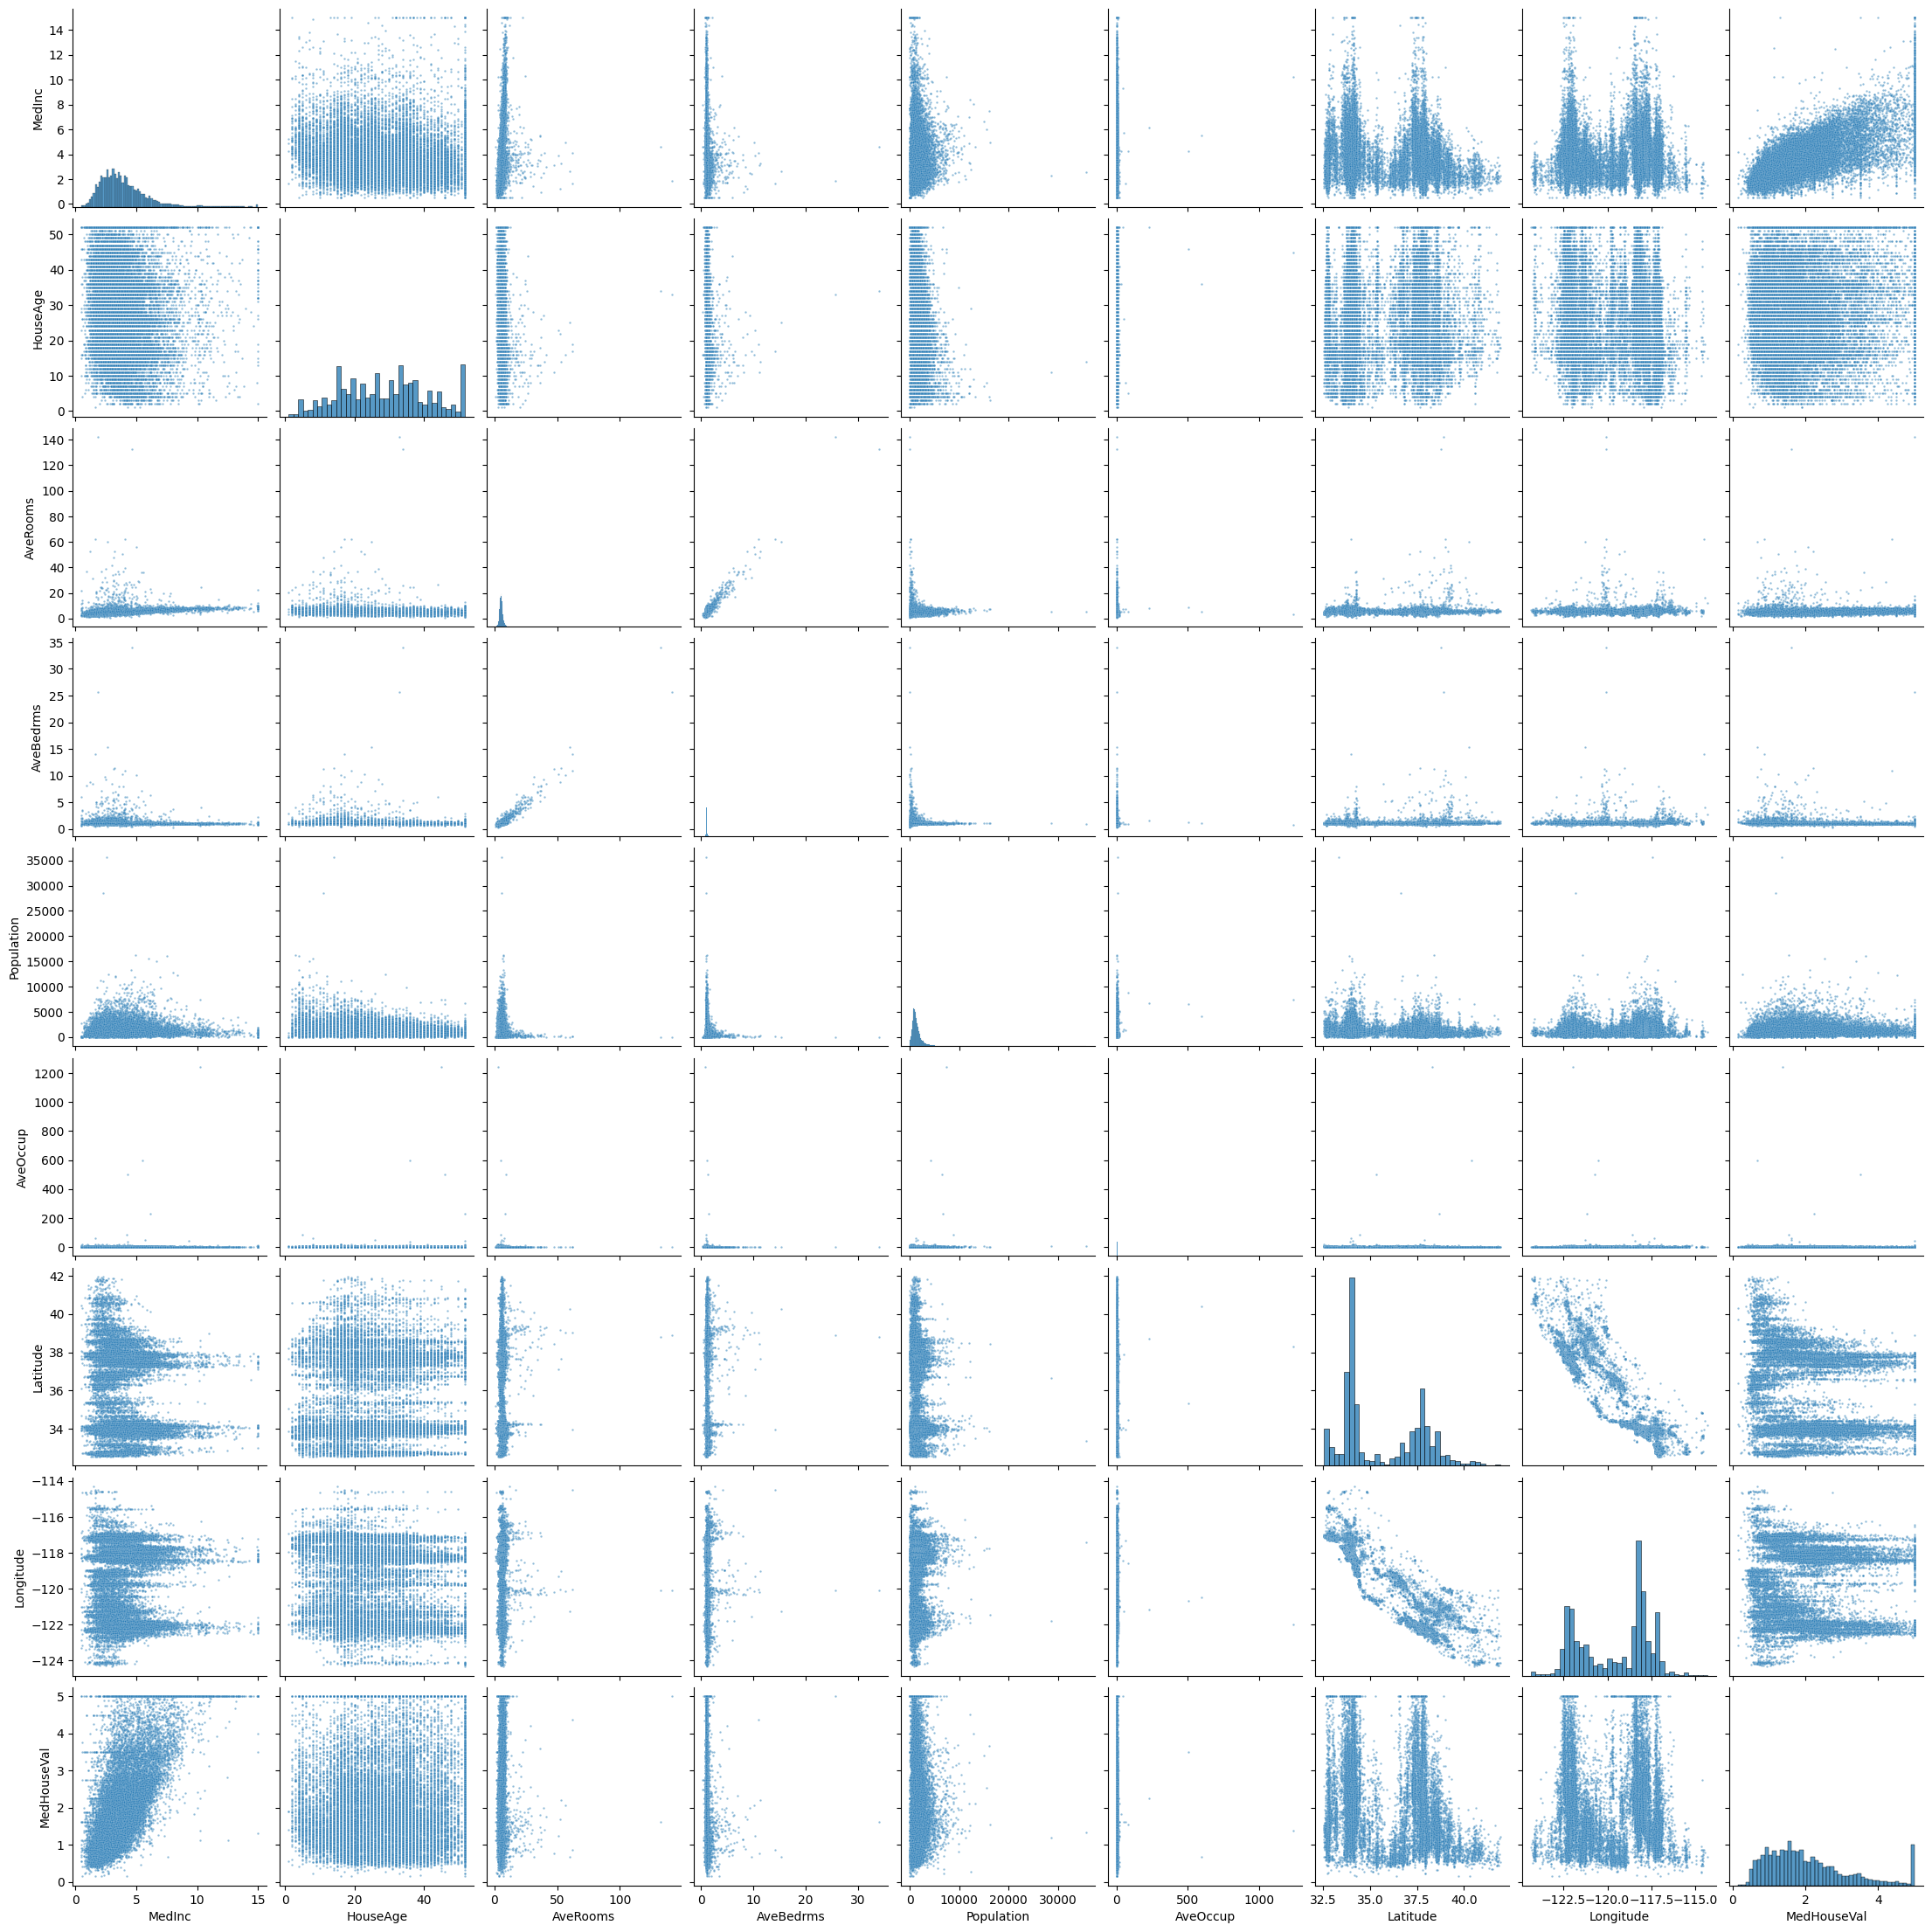

In [51]:
sns.pairplot(data=df, plot_kws={'s': 3, 'alpha': 0.5})

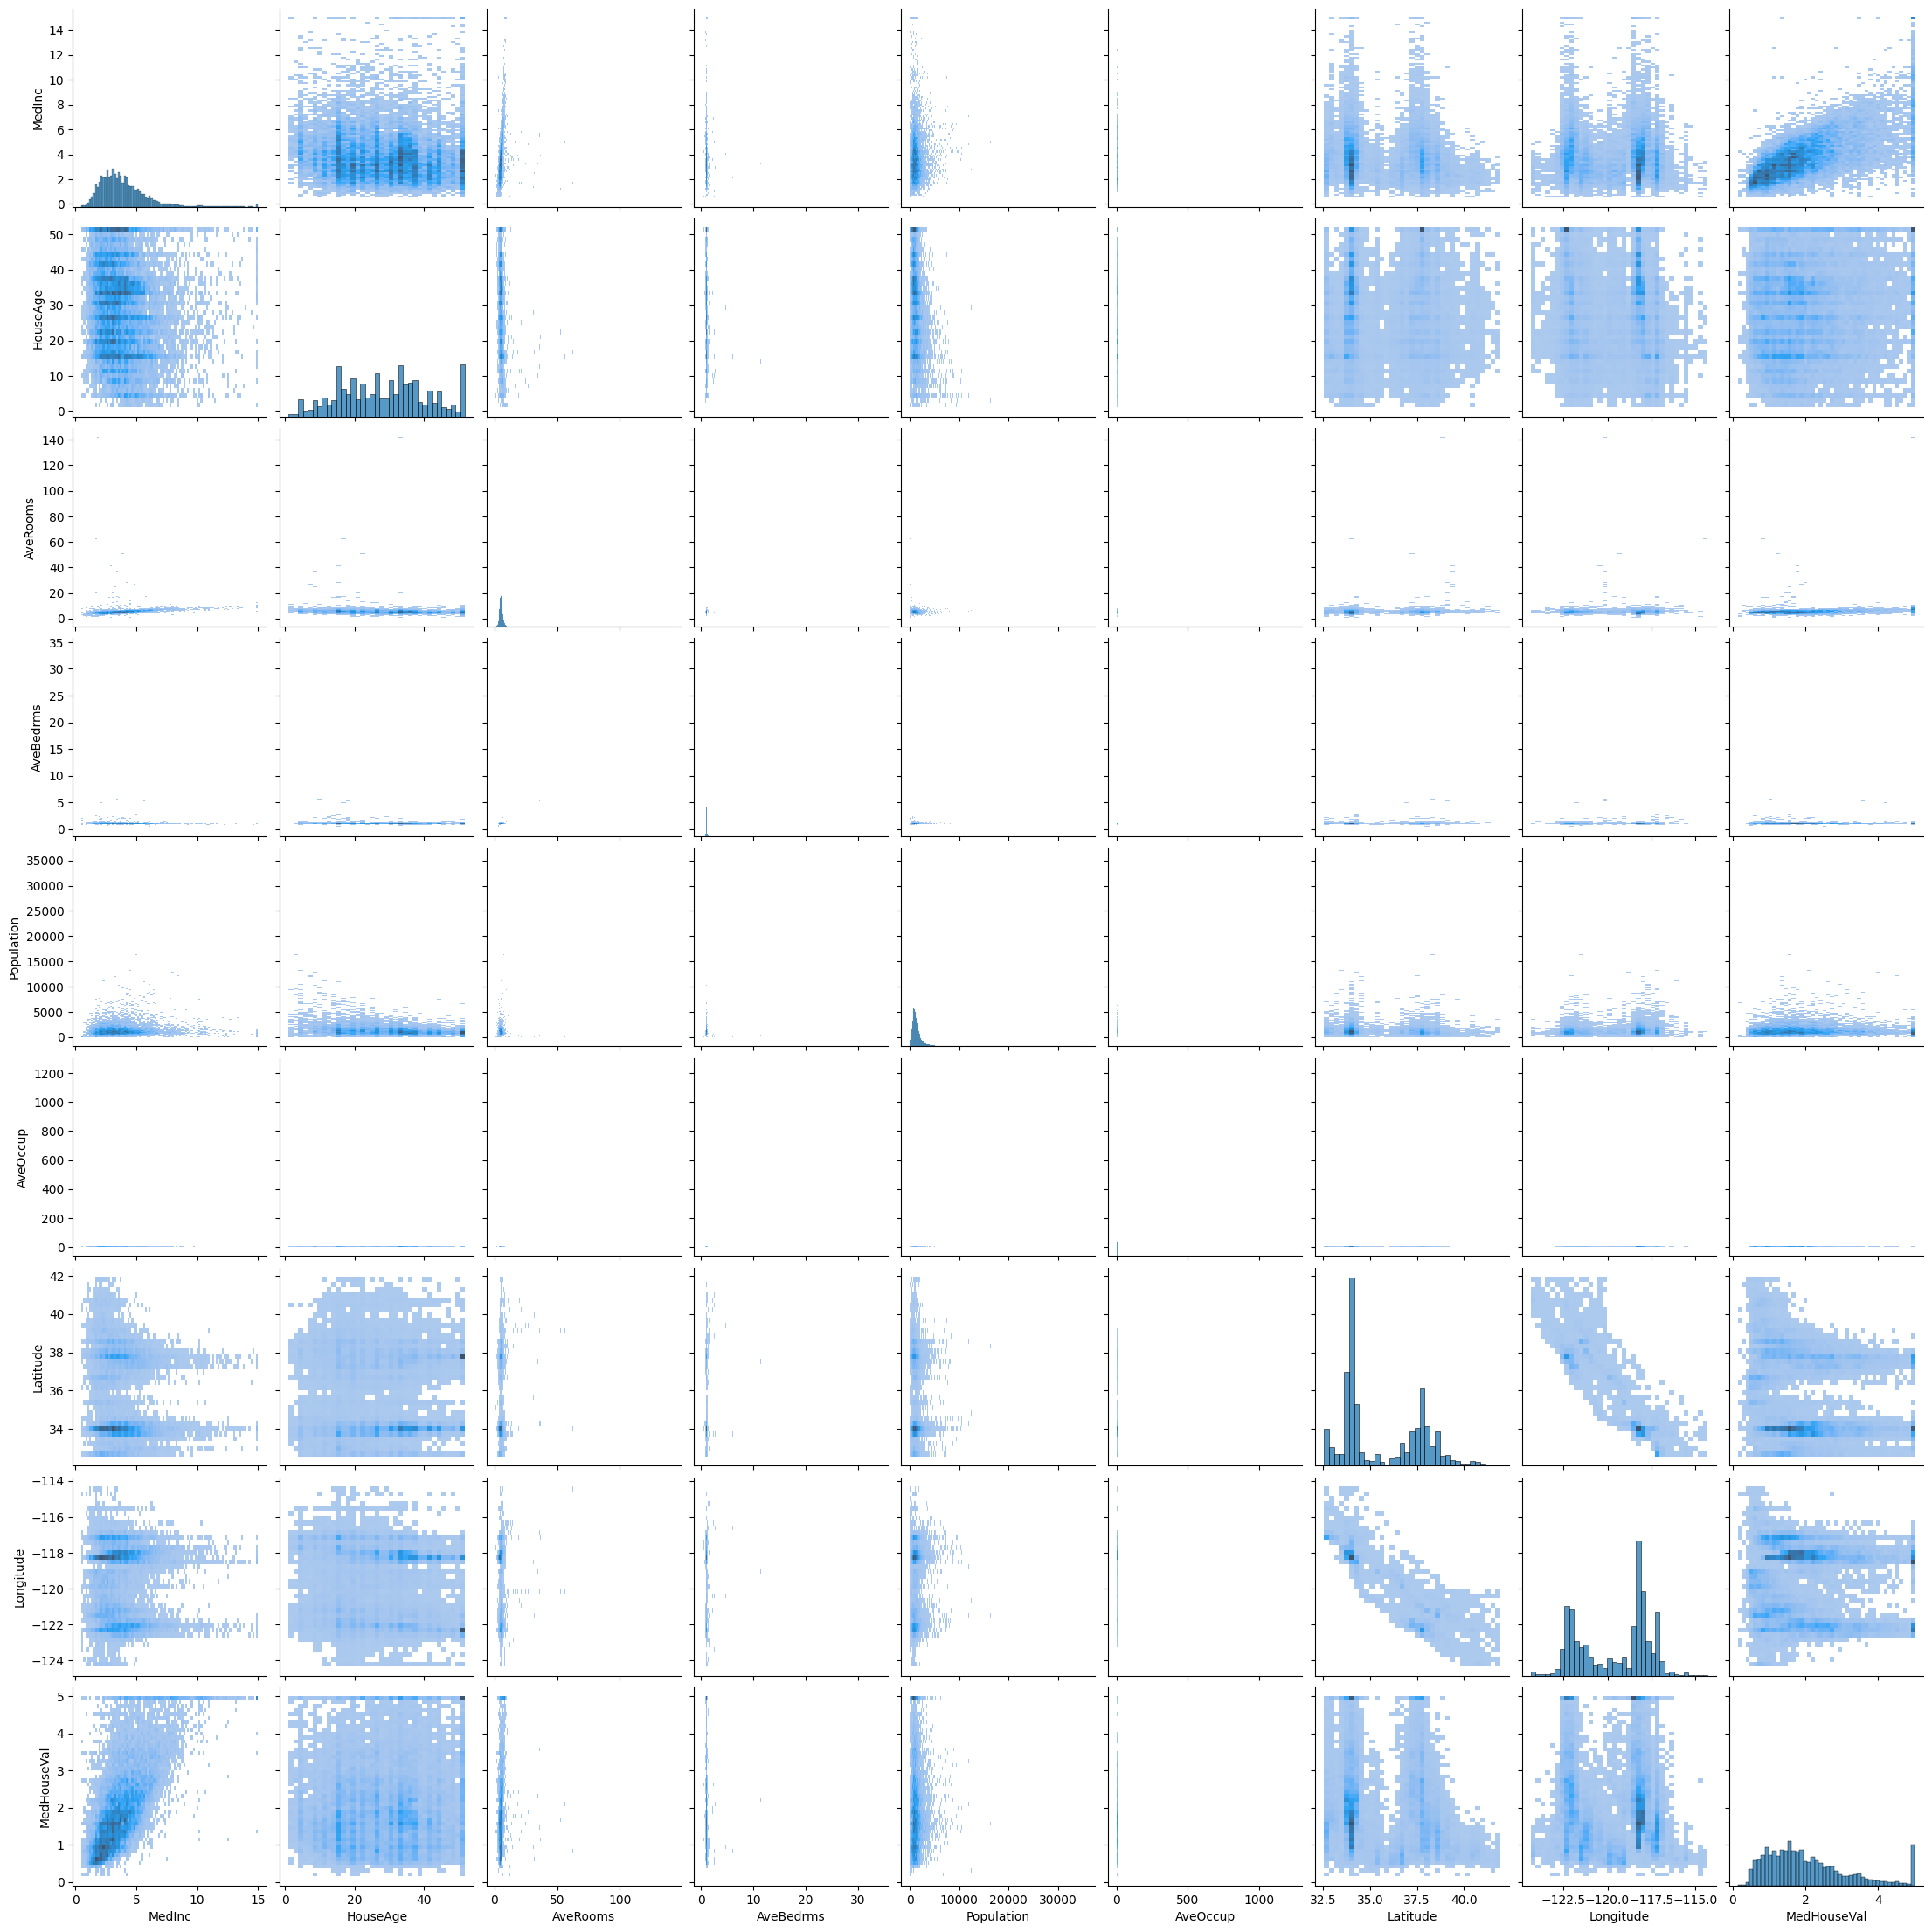

In [52]:
sns.pairplot(data=df, kind='hist')


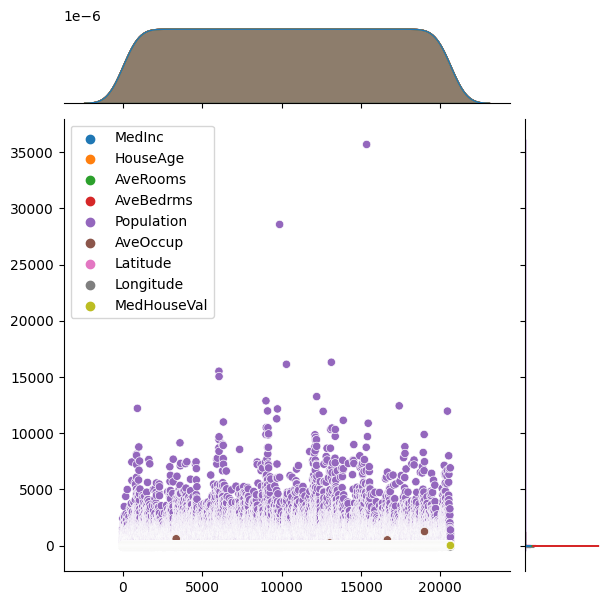

In [53]:
sns.jointplot(data=df)


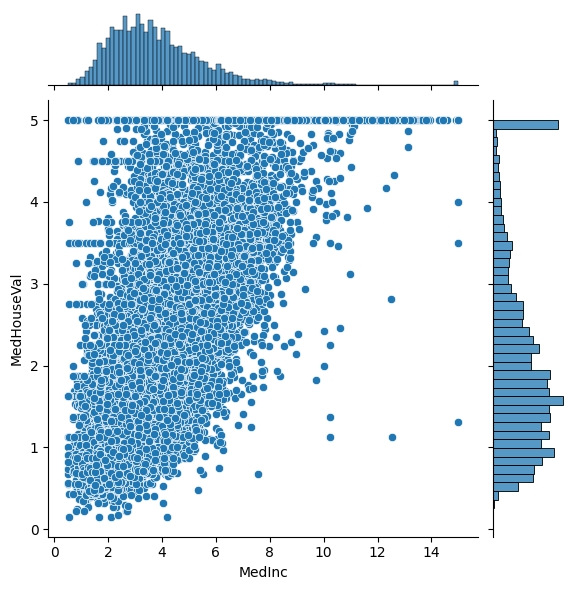

In [54]:
sns.jointplot(data=df, x="MedInc", y="MedHouseVal")


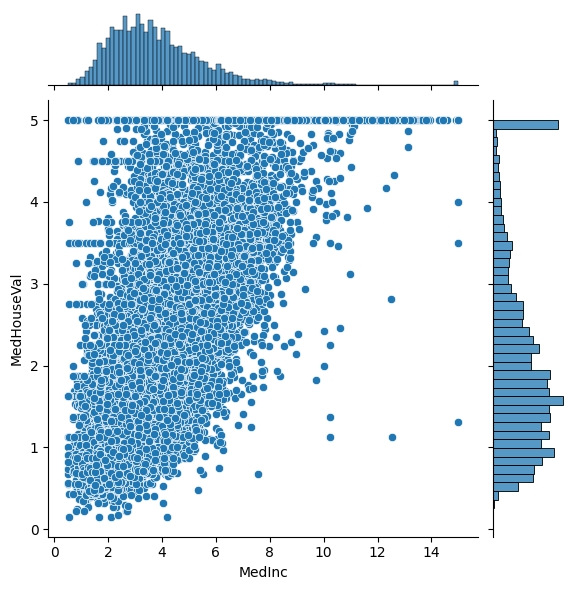

In [55]:
sns.jointplot(data=df, x="MedInc", y="MedHouseVal")

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]),
 [Text(0, 0.5, 'MedInc'),
  Text(0, 1.5, 'HouseAge'),
  Text(0, 2.5, 'AveRooms'),
  Text(0, 3.5, 'AveBedrms'),
  Text(0, 4.5, 'Population'),
  Text(0, 5.5, 'AveOccup'),
  Text(0, 6.5, 'Latitude'),
  Text(0, 7.5, 'Longitude'),
  Text(0, 8.5, 'MedHouseVal')])

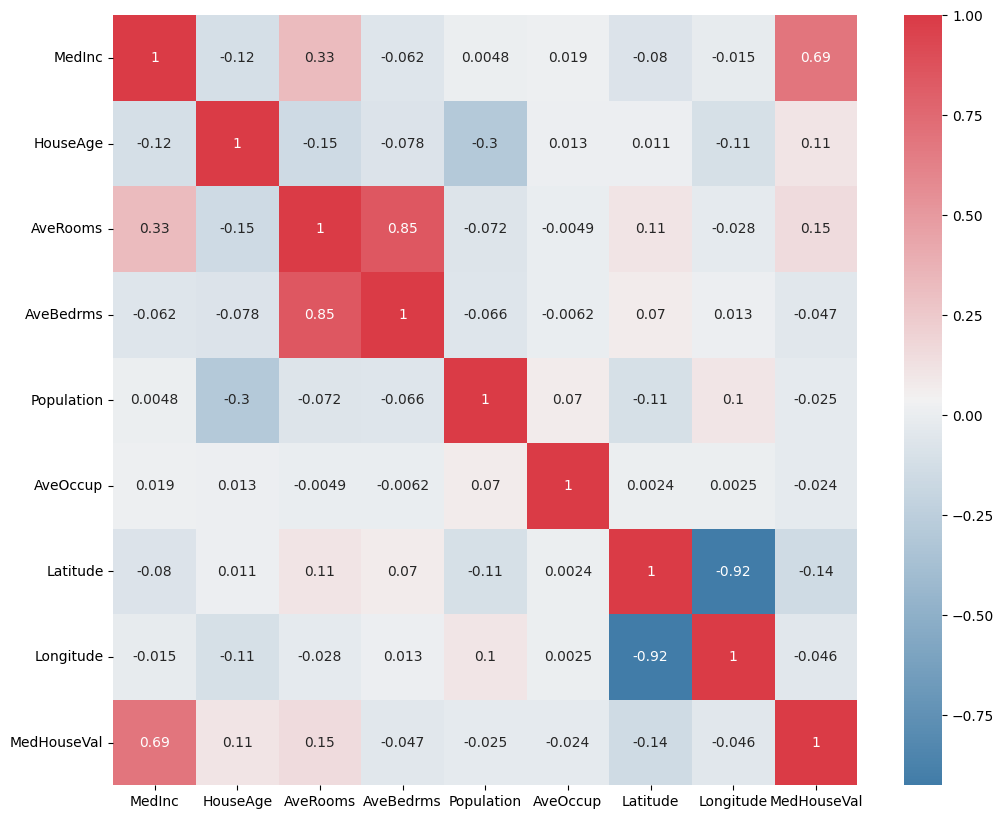

In [56]:
corr = df.corr(method='pearson')
_, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap=sns.diverging_palette(240, 10, as_cmap = True), ax=ax)
plt.yticks(rotation=0)


In [57]:
x = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

x = MinMaxScaler().fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


In [70]:
models = [LinearRegression(), RidgeCV(), LassoCV()]

for model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(
        f"{model.__class__.__name__} MSE: {mean_squared_error(y_test, y_pred)}"
    )
    print(f"{model.__class__.__name__} Score: {model.score(x_test, y_test)}")
    print(f"{model.__class__.__name__} Coef: {model.coef_}")
    print(f"{model.__class__.__name__} Intercept: {model.intercept_}")

    if "alpha_" in model.__dict__:
        print(f"{model.__class__.__name__} Alpha: {model.alpha_}")

    print()


LinearRegression MSE: 0.5049091290771165
LinearRegression Score: 0.6228665767130329
LinearRegression Coef: [  6.38683549   0.47193955 -15.86615062  21.51735375  -0.14339298
  -5.10621226  -3.91803104  -4.30850056]
LinearRegression Intercept: 3.7142896864917514

RidgeCV MSE: 0.5050858987131068
RidgeCV Score: 0.622734541592028
RidgeCV Coef: [  6.12136933   0.47718212 -11.08261813  16.13119267  -0.12231246
  -4.62074445  -4.02285072  -4.40422561]
RidgeCV Intercept: 3.8178464174409825
RidgeCV Alpha: 0.1

LassoCV MSE: 0.5051660840917175
LassoCV Score: 0.6226746484655395
LassoCV Coef: [ 6.05338938  0.4822955  -9.85803853 14.85751083 -0.01825505 -3.65175397
 -4.03137359 -4.40899551]
LassoCV Intercept: 3.818963001457904
LassoCV Alpha: 0.00010266347572575366



LinearRegression MSE: 0.5049091290771165

RidgeCV MSE: 0.5050858987131068

LassoCV MSE: 0.5051660840917175

RidgeCV Alpha: 0.1

LassoCV Alpha: 0.00010266347572575366